<a href="https://colab.research.google.com/github/aldojda/MachineLearningUANL/blob/main/Actividad_clase_3_selectKbest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importamos google coolab para trabajar con archivos de Drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
#importamos librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("gdrive/MyDrive/Maestría Ciencia de Datos/MachineLearningUANL/ChurnDataSet.csv")
df.set_index('customerID', inplace = True)
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
def transform_float(x):
    try:
        x = float(x)
        return x
    except:
        return None
        
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].apply(lambda x: transform_float(x))
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].astype(float)

## Codificamos la data

### One-Hot Encoding

In [9]:
#codificamos variables categóricas

df_encode = pd.get_dummies(df, columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService',
                                                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 
                                                     'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod', 'Churn'])
#Eliminamos columnas redudundantes correlaciones (+1 y -1), sólo nos quedaremos con 1 de ellas para evitar este problema
cat2del = ['OnlineSecurity_No internet service',
            'OnlineBackup_No internet service',
            'DeviceProtection_No internet service',
            'TechSupport_No internet service', 'StreamingTV_No internet service',
            'StreamingMovies_No internet service',
        'MultipleLines_No phone service','Churn_No', 'gender_Female','Dependents_No',
        'PhoneService_No', 'InternetService_No']

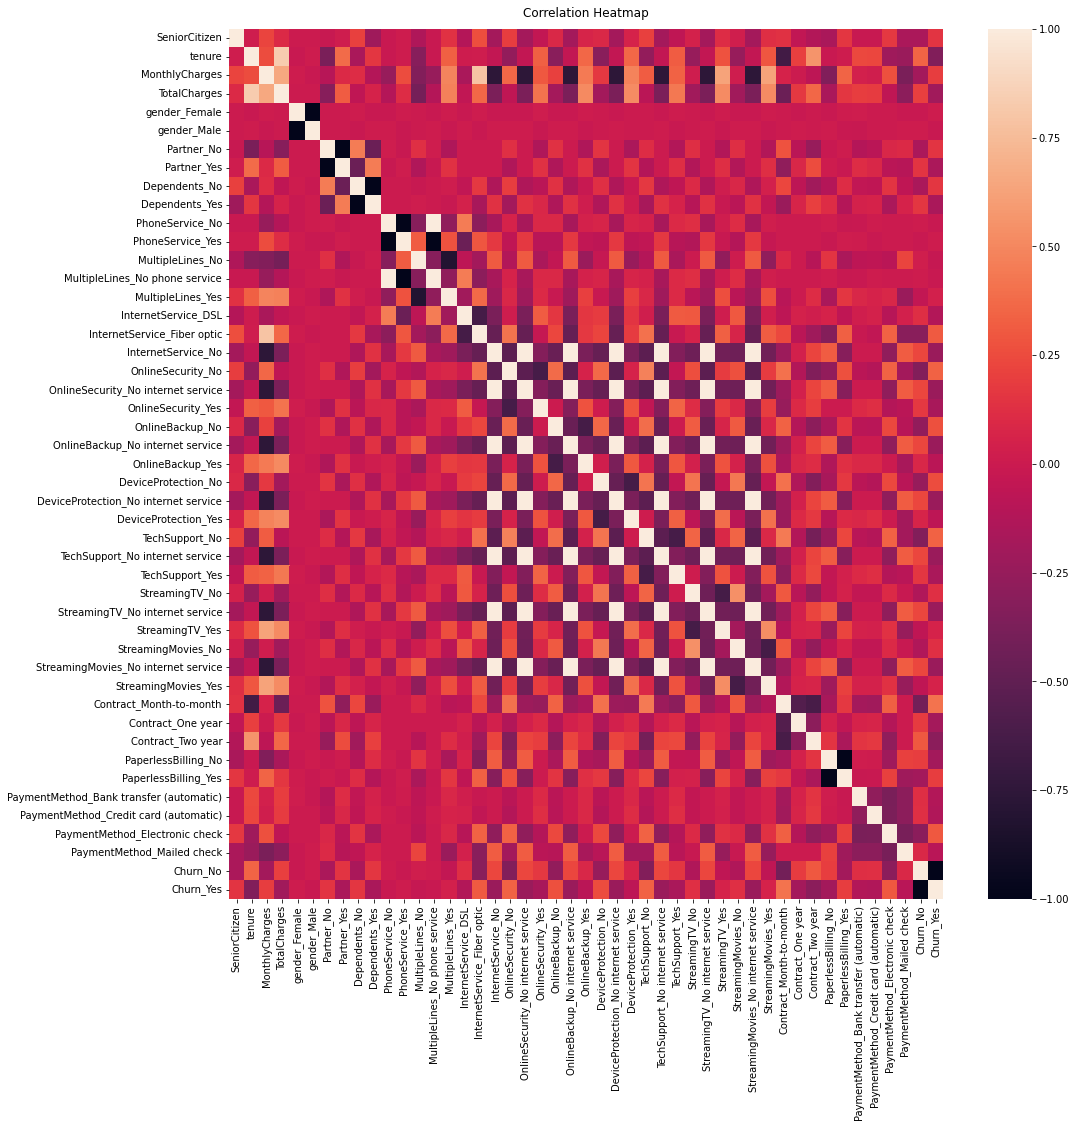

In [13]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df_encode.corr().round(2), vmin=-1, vmax=1, annot=False)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

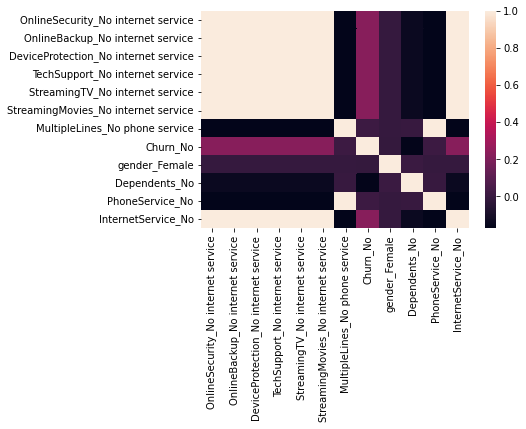

In [17]:
sns.heatmap(df_encode[cat2del].corr())

como podemos observar en la matriz de correlación existen columnas **Redundantes** las cuales al codificar los valores de cada una nos dan valores de correlación igual a 1 y -1, fuera de la diagonal lo podemos ver en la gráfica como los colores blanco y negro.

guardaremos estos valores redundantes en una lista para desecharlos luego.

In [36]:
print(df_encode.shape)
df_ = df_encode.drop(columns = cat2del)
print(df_.shape)

(7043, 47)
(7043, 35)


In [37]:
df_.head(1)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [38]:
df_ = df_.dropna()

In [54]:
from sklearn.feature_selection import SelectKBest, chi2
y = df_['Churn_Yes']
X = df_.loc[:,~df_.columns.isin(['Churn_Yes'])]

In [56]:
select = SelectKBest(chi2, k=10)
x_select = select.fit_transform(X, y)
X.loc[:,select.get_support()]

,tenure,MonthlyCharges,TotalCharges,InternetService_Fiber optic,OnlineSecurity_No,OnlineBackup_No,TechSupport_No,Contract_Month-to-month,Contract_Two year,PaymentMethod_Electronic check
customerID,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,1,0,1,1,0,1
5575-GNVDE,34,56.95,1889.50,0,0,1,1,0,0,0
3668-QPYBK,2,53.85,108.15,0,0,0,1,1,0,0
7795-CFOCW,45,42.30,1840.75,0,0,1,0,0,0,0
9237-HQITU,2,70.70,151.65,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,84.80,1990.50,0,0,1,0,0,0,0
2234-XADUH,72,103.20,7362.90,1,1,0,1,0,0,0
4801-JZAZL,11,29.60,346.45,0,0,1,1,1,0,1


In [57]:
#si seleccionamos 10 las mejores columnas son : 
X.loc[:,select.get_support()].columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No',
       'TechSupport_No', 'Contract_Month-to-month', 'Contract_Two year',
       'PaymentMethod_Electronic check'],
      dtype='object')